In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import os
import glob

In [104]:
def read_file(file_path):
    
    splitted_filename = file_path.split("_")
    #initialize storage variables
    flag = int(splitted_filename[0][-1])
    num_points = int(splitted_filename[1])
    num_trials = int(splitted_filename[2])
    dimension = int(splitted_filename[-1].split('.')[0])
    
    trials = []
    average_sum = 0
    time = 0
    with open(file_path,'r') as f:
        for line in f:
            if line.startswith('trial'):
                trials.append(float(line.split(" ")[-1].strip()))
            elif line.startswith('average'):
                average_sum = float(line.split(" ")[-1].strip())
            elif "seconds" in line:
                time = int(line.split(" ")[0])
    
    result_dict = {"flag":flag,"num_points":num_points,"num_trials":num_trials,"dimension":dimension,
           "average_sum":average_sum,"time":time}
    
    return result_dict
    

file_path = "results/0_4096_10_0.txt"
read_file(file_path)

{'flag': 0,
 'num_points': 4096,
 'num_trials': 10,
 'dimension': 0,
 'average_sum': 1.20356,
 'time': 0}

In [105]:
files = os.listdir('results/')


def create_df(files):
    
    results_dict_list=[]
    for file_path in files:
        results_dict_list.append(read_file(os.path.join('results/',file_path)))
    df = pd.DataFrame(results_dict_list)
    return df

df = create_df(files)

In [106]:
zero_dimension_df = df[df['dimension']==0]
two_dimension_df = df[df['dimension']==2]
three_dimension_df = df[df['dimension']==3]
four_dimension_df = df[df['dimension']==4]


In [129]:
zero_dimension_result_df = zero_dimension_df.filter(['num_points','average_sum','time'])
zero_dimension_result_df.sort_values(by='num_points').reset_index(drop=True)

,num_points,average_sum,time
0,128,1.19114,0
1,256,1.18613,0
2,512,1.17690,1
3,1024,1.21117,0
4,2048,1.19815,0
5,4096,1.20356,0
6,8192,1.20216,2
7,16384,1.20424,9
8,32768,1.20226,33
9,65536,1.20012,145


In [130]:
two_dimension_result_df = two_dimension_df.filter(['num_points','average_sum','time'])
two_dimension_result_df.sort_values(by='num_points').reset_index(drop=True)

,num_points,average_sum,time
0,128,7.65635,0
1,256,10.73810,0
2,512,15.03500,0
3,1024,21.12590,0
4,2048,29.73910,0
5,4096,41.82660,1
6,8192,58.89890,1
7,16384,83.19840,5
8,32768,117.56500,20
9,65536,165.98200,79


In [131]:
three_dimension_result_df = three_dimension_df.filter(['num_points','average_sum','time'])
three_dimension_result_df.sort_values(by='num_points').reset_index(drop=True)

,num_points,average_sum,time
0,128,17.6629,0
1,256,27.8478,0
2,512,43.3918,0
3,1024,68.4300,1
4,2048,107.4780,0
5,4096,169.3270,0
6,8192,266.5630,2
7,16384,422.7010,5
8,32768,668.6500,24
9,65536,1058.8900,96


In [132]:
four_dimension_result_df = four_dimension_df.filter(['num_points','average_sum','time'])
four_dimension_result_df.sort_values(by='num_points').reset_index(drop=True)

,num_points,average_sum,time
0,128,28.5678,0
1,256,47.1418,0
2,512,78.4115,0
3,1024,129.9190,0
4,2048,217.0190,0
5,4096,362.0450,1
6,8192,602.6440,1
7,16384,1008.3300,7
8,32768,1687.6800,25
9,65536,2828.4400,106


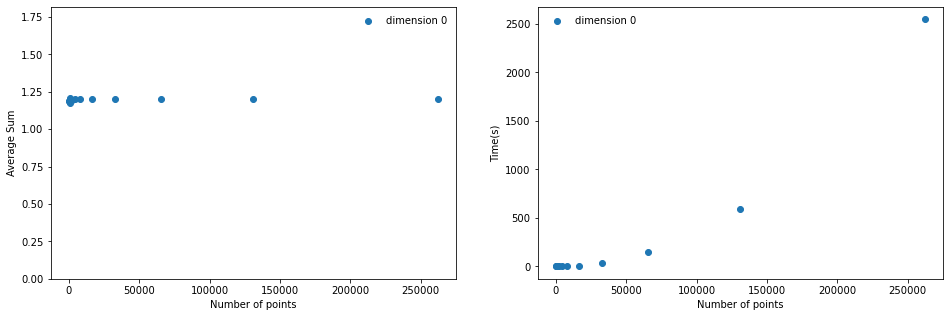

In [117]:
def plotting(df):
    fig,ax = plt.subplots(1,2,figsize=(16,5))
    ax[0].plot(df['num_points'],df['average_sum'],'o',label='dimension '+str(df['dimension'].iloc[0]))
    ax[0].set_xlabel('Number of points')
    ax[0].set_ylabel('Average Sum')
    ax[1].plot(df['num_points'],df['time'],'o',label='dimension '+str(df['dimension'].iloc[0]))
    ax[1].set_xlabel('Number of points')
    ax[1].set_ylabel('Time(s)')
    ax[0].legend(frameon=False)
    ax[1].legend(frameon=False)
    ax[0].set_ylim(0,max(df['average_sum'])*1.5)
    plt.show()
plotting(zero_dimension_df)

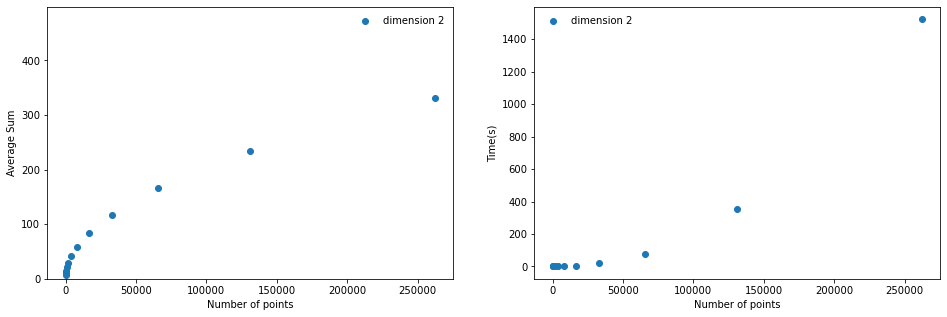

In [118]:
plotting(two_dimension_df)

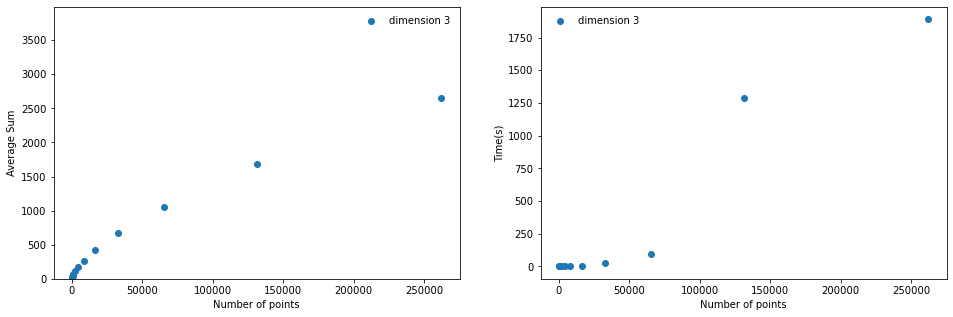

In [119]:
plotting(three_dimension_df)

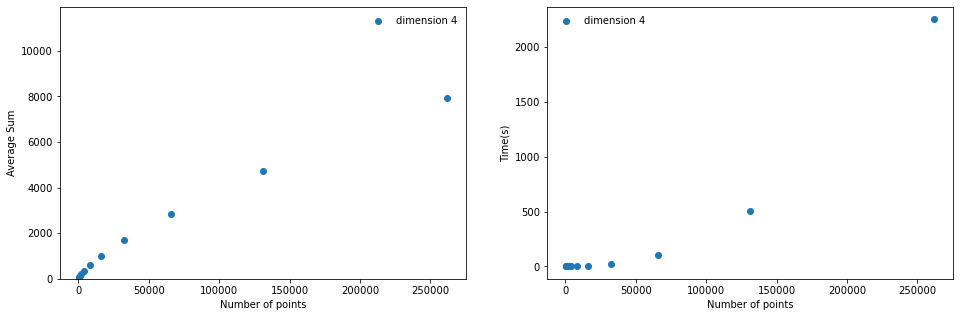

In [120]:
plotting(four_dimension_df)

# Fitting

In [231]:
def fit(df,power,label='2 dimension'):
    full_param = np.polyfit(df['num_points']/df['num_points']**power,df['average_sum'],deg=1,full=True)
    fit = np.poly1d(full_param[0])
    plt.plot(df['num_points']/df['num_points']**power,df['average_sum'],'o',label=label)
    plt.plot(df['num_points']/df['num_points']**power,fit(df['num_points']/df['num_points']**power),label = 'fitted curve: w = %.2f'%(full_param[0][0])+'$n^{%.2f}$'%(1-power)+'+%.2f'%(full_param[0][1]))
    plt.xlabel("$n^{%.2f}$"%(1-power),fontsize=12)
    plt.ylabel("Total sum",fontsize=12)
    plt.legend(frameon=False,fontsize=12)
    plt.show()
    return full_param

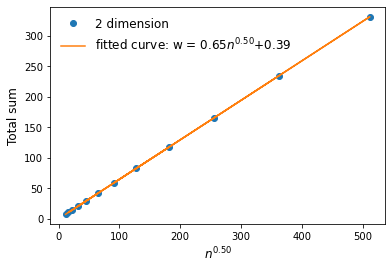

(array([0.64708365, 0.38811148]),
 array([0.01824353]),
 2,
 array([1.29850597, 0.56025195]),
 2.6645352591003757e-15)

In [226]:
fit(two_dimension_result_df,0.5)

In [242]:
np.polyfit(two_dimension_result_df['num_points'],two_dimension_result_df['average_sum'],deg=8,full=True)


(array([-1.27827356e-34,  6.67954336e-29, -1.15965117e-23,  8.57374173e-19,
        -2.92317197e-14,  4.72760880e-10, -3.70020853e-06,  1.76384270e-02,
         6.21399379e+00]),
 array([1.67613095]),
 9,
 array([2.81152757e+00, 9.66446445e-01, 3.97061801e-01, 6.00755305e-02,
        5.17420612e-03, 2.45129601e-04, 5.99681960e-06, 6.96725137e-08,
        3.27531120e-10]),
 2.6645352591003757e-15)

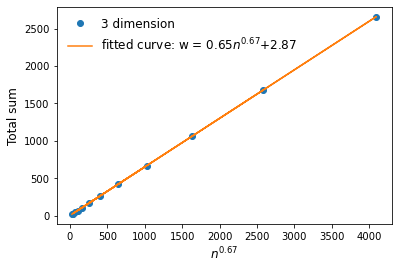

(array([0.64863196, 2.86686036]),
 array([16.07308396]),
 2,
 array([1.26629389, 0.6296823 ]),
 2.6645352591003757e-15)

In [232]:
fit(three_dimension_result_df,1/3,label='3 dimension')

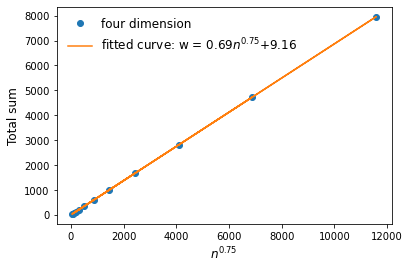

(array([0.68625812, 9.15712202]),
 array([364.8879254]),
 2,
 array([1.25355878, 0.65466815]),
 2.6645352591003757e-15)

In [233]:


fit(four_dimension_result_df,1/4,label='four dimension')



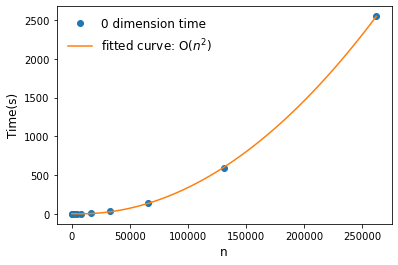

(array([ 3.90185517e-08, -5.30302341e-04,  2.73757344e+00]),
 array([284.2237811]),
 3,
 array([1.5036823 , 0.84127496, 0.1766239 ]),
 2.6645352591003757e-15)

In [259]:
def fit_time(df,degree=1,label='0 dimension'):
    full_param = np.polyfit(df['num_points'],df['time'],deg=degree,full=True)
    fit = np.poly1d(full_param[0])
    plt.plot(df['num_points'],df['time'],'o',label=label)
    plt.plot(np.linspace(0,262144),fit(np.linspace(0,262144)),label = 'fitted curve: O($n^2$)')
    plt.xlabel("n",fontsize=12)
    plt.ylabel("Time(s)",fontsize=12)
    plt.legend(frameon=False,fontsize=12)
    plt.show()
    return full_param

fit_time(zero_dimension_result_df,degree=2,label='0 dimension time')

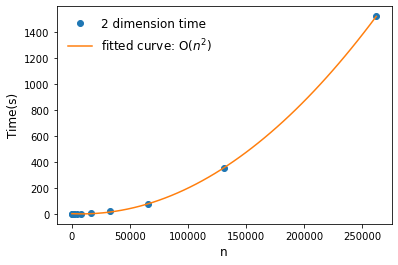

(array([ 2.35916389e-08, -3.88791924e-04,  1.84854393e+00]),
 array([74.32619986]),
 3,
 array([1.5036823 , 0.84127496, 0.1766239 ]),
 2.6645352591003757e-15)

In [262]:
fit_time(two_dimension_result_df,degree=2,label='2 dimension time')

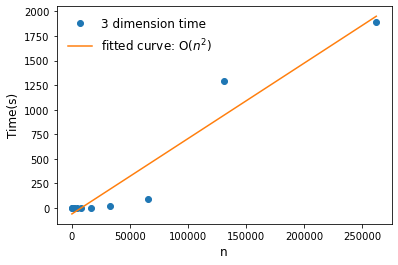

(array([ 3.78261347e-11,  7.65594622e-03, -5.92838858e+01]),
 array([288677.36970175]),
 3,
 array([1.5036823 , 0.84127496, 0.1766239 ]),
 2.6645352591003757e-15)

In [266]:
fit_time(three_dimension_result_df,degree=2,label='3 dimension time')

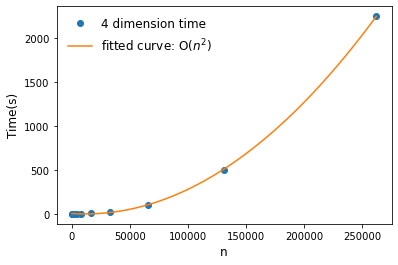

(array([ 3.58015050e-08, -8.22219587e-04,  3.63560219e+00]),
 array([271.23500219]),
 3,
 array([1.5036823 , 0.84127496, 0.1766239 ]),
 2.6645352591003757e-15)

In [265]:
fit_time(four_dimension_result_df,degree=2,label='4 dimension time')